# 1. Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import mglearn
import seaborn as sns

# 2. Importing the dataset

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_genders=pd.read_csv('gender_submission.csv')
df_genders.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# 3. Exploratory data analysis

In [6]:
y_train=df_train.Survived
df_train.drop(['Survived'],inplace=True,axis=1)
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.drop(['PassengerId'],inplace=True,axis=1)
passenger_id=df_test.PassengerId
df_test.drop(['PassengerId'],inplace=True,axis=1)

In [8]:
df_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_concat=pd.concat([df_train,df_test],axis=0)
df_concat.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_concat.drop(['Name','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [12]:
df_concat.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [13]:
sex={'female':0,'male':1}
df_concat.Sex=[sex[item] for item in df_concat.Sex]
df_concat.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,S
1,1,0,38.0,1,0,C
2,3,0,26.0,0,0,S
3,1,0,35.0,1,0,S
4,3,1,35.0,0,0,S


In [14]:
df_concat['family']=df_concat.SibSp+df_concat.Parch
df_concat.head()
print(df_concat.family.value_counts())

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family, dtype: int64


In [15]:
family=[]
for i in df_concat.family:
    if i==0:
        family.append(0)
    else:
        family.append(1)

df_concat.drop(['family'],inplace=True,axis=1)
df_concat['family']=family
df_concat.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,3,1,22.0,1,0,S,1
1,1,0,38.0,1,0,C,1
2,3,0,26.0,0,0,S,0
3,1,0,35.0,1,0,S,1
4,3,1,35.0,0,0,S,0


In [16]:
df_concat.drop(['SibSp','Parch'],inplace=True,axis=1)

In [17]:
age=[]
for i in df_concat.Age:
    if i <18:
        age.append('Child')
    elif i>=18 and i<=50:
        age.append('Adult')
    else:
        age.append('Old')
df_concat.drop(['Age'],inplace=True,axis=1)
df_concat['Age']=age

In [18]:
df_concat.head()

,Pclass,Sex,Embarked,family,Age
0,3,1,S,1,Adult
1,1,0,C,1,Adult
2,3,0,S,0,Adult
3,1,0,S,1,Adult
4,3,1,S,0,Adult


In [19]:
df_concat_dummies=pd.get_dummies(df_concat)

In [20]:
X_train=df_concat_dummies.iloc[:891,:].values
X_test=df_concat_dummies.iloc[891:,:].values
print(X_train.shape)
print(X_test.shape)

(891, 9)
(418, 9)


# 4. Building the data Model

In [21]:
#from sklearn.decomposition import PCA
#from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
#pipe=make_pipeline(PCA(n_components=2),LogisticRegression())
pipe=make_pipeline(RandomForestClassifier(n_estimators=100))
pipe.fit(X_train,y_train)

NameError: name 'make_pipeline' is not defined

# 5. Model Evaluation

In [56]:
y_pred=pipe.predict(X_test)
df_genders['Pred']=y_pred
df_genders.head()

,PassengerId,Survived,Pred
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,0


In [57]:
y_test=df_genders.Survived

Text(33.0, 0.5, 'True Y')

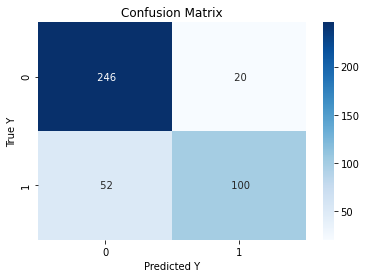

In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,fmt=' ',cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('True Y')
ax.set_ylabel('Predicte Y')

In [59]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Test Score: {:.2f}'.format(accuracy))

Test Score: 0.83


In [60]:
df_genders.to_csv('answer.csv')